<a href="https://colab.research.google.com/github/hdmetz/pa_1/blob/main/ChatGPT_opinions_Hunter_Metz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#PIP installation of praw and vader sentiment anaylsis
! pip install praw
! pip install vadersentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 1.3 MB/s eta 0:00:00


In [ ]:
#Import praw, pandas, and praw models
import praw
import pandas as pd
from praw.models import MoreComments

In [ ]:
#Import nltk, stopwords, Regex, Lemmatizer, stemmer, and FreqDist
import nltk
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk import FreqDist

[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#Import re, en_core_web_sm, spact, VaderSentiment
import re
import en_core_web_sm
import spacy
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer as SIA

"""Importation of packages"""

'Importation of packages'

In [ ]:
#Reddit scraping inital access with the use of praw
reddit = praw.Reddit(client_id="kRNM4V240E324vXLNwiqeg",
                     client_secret="_RsXeJKstuK7uW1MrUzXhPeR5WTh6g",
                     user_agent="ChatGPTassociation/1.0 (by /u/huntermetz218)",
                     username = "huntermetz218",
                     password = "DLHKTm2618!")

In [ ]:
#Gaining access of reddit submission comments of the top 100
subreddit = reddit.subreddit('ChatGPT')
for submission in subreddit.hot(limit=100):
    print(submission.title)
    print('submission ID = ', submission.id, '\n')

"""Reddit scraping access and gaining access to submission comments with PRAW"""

In [ ]:
#Chosen post with Approximately 1.7K comments
Post1 = reddit.submission(id='12o4qaw')

"""Gaining access to chosen dataset"""

'Gaining access to chosen dataset'

In [ ]:
#Adding comments to list
Comments_ALL = []
Post1.comments.replace_more(limit=None)
for comments in Post1.comments.list():
    Comments_ALL.append(comments.body)

"""Adding comments to list"""

In [ ]:
#Print commments w/ length
print(Comments_ALL, '\n')
print('Scraped comments:', (len(Comments_ALL)))

"""Adding and printing comments length"""

["Hey /u/jackredditlol, please respond to this comment with the prompt you used to generate the output in this post. Thanks!\n\n^(Ignore this comment if your post doesn't have a prompt.)\n\n***We have a [public discord server](https://discord.gg/r-chatgpt-1050422060352024636). There's a free Chatgpt bot, Open Assistant bot (Open-source model), AI image generator bot, Perplexity AI bot, &#x1F916; GPT-4 bot ([Now with Visual capabilities!](https://cdn.discordapp.com/attachments/812770754025488386/1095397431404920902/image0.jpg)) and channel for latest prompts.[So why not join us?](https://discord.gg/NuefU36EC2)***\n\nPSA: For any Chatgpt-related issues email support@openai.com\n\n\n*I am a bot, and this action was performed automatically. Please [contact the moderators of this subreddit](/message/compose/?to=/r/ChatGPT) if you have any questions or concerns.*", "I work as a teacher, and I'm involved heavily in adjusting for AI in my region. \n\nWe're shifting tasks to focus on reflection

'Adding and printing comments length'

In [ ]:
#Join lists
List1 = Comments_ALL
List1 = [str(i) for i in List1]
string_uncleaned = ', '.join(List1)
string_uncleaned

"""Joining lists"""

'Joining lists'

In [ ]:
#Tokenizer with the use of Regex
tokenizer = RegexpTokenizer('\w+|\$[\d\.]+|http\S+')
tokenized_string = tokenizer.tokenize(string_uncleaned)
print(tokenized_string)

"""Tokenize"""

['Hey', 'u', 'jackredditlol', 'please', 'respond', 'to', 'this', 'comment', 'with', 'the', 'prompt', 'you', 'used', 'to', 'generate', 'the', 'output', 'in', 'this', 'post', 'Thanks', 'Ignore', 'this', 'comment', 'if', 'your', 'post', 'doesn', 't', 'have', 'a', 'prompt', 'We', 'have', 'a', 'public', 'discord', 'server', 'https', 'discord', 'gg', 'r', 'chatgpt', '1050422060352024636', 'There', 's', 'a', 'free', 'Chatgpt', 'bot', 'Open', 'Assistant', 'bot', 'Open', 'source', 'model', 'AI', 'image', 'generator', 'bot', 'Perplexity', 'AI', 'bot', 'x1F916', 'GPT', '4', 'bot', 'Now', 'with', 'Visual', 'capabilities', 'https', 'cdn', 'discordapp', 'com', 'attachments', '812770754025488386', '1095397431404920902', 'image0', 'jpg', 'and', 'channel', 'for', 'latest', 'prompts', 'So', 'why', 'not', 'join', 'us', 'https', 'discord', 'gg', 'NuefU36EC2', 'PSA', 'For', 'any', 'Chatgpt', 'related', 'issues', 'email', 'support', 'openai', 'com', 'I', 'am', 'a', 'bot', 'and', 'this', 'action', 'was', 'pe

'Tokenize'

In [ ]:
#Lowercase tokens
lower_string_tokenized = [word.lower() for word in tokenized_string]
print(lower_string_tokenized)

"""Lowercase words"""

['hey', 'u', 'jackredditlol', 'please', 'respond', 'to', 'this', 'comment', 'with', 'the', 'prompt', 'you', 'used', 'to', 'generate', 'the', 'output', 'in', 'this', 'post', 'thanks', 'ignore', 'this', 'comment', 'if', 'your', 'post', 'doesn', 't', 'have', 'a', 'prompt', 'we', 'have', 'a', 'public', 'discord', 'server', 'https', 'discord', 'gg', 'r', 'chatgpt', '1050422060352024636', 'there', 's', 'a', 'free', 'chatgpt', 'bot', 'open', 'assistant', 'bot', 'open', 'source', 'model', 'ai', 'image', 'generator', 'bot', 'perplexity', 'ai', 'bot', 'x1f916', 'gpt', '4', 'bot', 'now', 'with', 'visual', 'capabilities', 'https', 'cdn', 'discordapp', 'com', 'attachments', '812770754025488386', '1095397431404920902', 'image0', 'jpg', 'and', 'channel', 'for', 'latest', 'prompts', 'so', 'why', 'not', 'join', 'us', 'https', 'discord', 'gg', 'nuefu36ec2', 'psa', 'for', 'any', 'chatgpt', 'related', 'issues', 'email', 'support', 'openai', 'com', 'i', 'am', 'a', 'bot', 'and', 'this', 'action', 'was', 'pe

'Lowercase words'

In [ ]:
#Get rid of stop words
nlp = en_core_web_sm.load()

all_stopwords = nlp.Defaults.stop_words

text = lower_string_tokenized
tokens_without_sw = [word for word in text if not word in all_stopwords]

print(tokens_without_sw)

"""Getting rid of stopwords and assiging to new tokens"""

['hey', 'u', 'jackredditlol', 'respond', 'comment', 'prompt', 'generate', 'output', 'post', 'thanks', 'ignore', 'comment', 'post', 'doesn', 't', 'prompt', 'public', 'discord', 'server', 'https', 'discord', 'gg', 'r', 'chatgpt', '1050422060352024636', 's', 'free', 'chatgpt', 'bot', 'open', 'assistant', 'bot', 'open', 'source', 'model', 'ai', 'image', 'generator', 'bot', 'perplexity', 'ai', 'bot', 'x1f916', 'gpt', '4', 'bot', 'visual', 'capabilities', 'https', 'cdn', 'discordapp', 'com', 'attachments', '812770754025488386', '1095397431404920902', 'image0', 'jpg', 'channel', 'latest', 'prompts', 'join', 'https', 'discord', 'gg', 'nuefu36ec2', 'psa', 'chatgpt', 'related', 'issues', 'email', 'support', 'openai', 'com', 'bot', 'action', 'performed', 'automatically', 'contact', 'moderators', 'subreddit', 'message', 'compose', 'r', 'chatgpt', 'questions', 'concerns', 'work', 'teacher', 'm', 'involved', 'heavily', 'adjusting', 'ai', 'region', 'shifting', 'tasks', 'focus', 'reflection', 'learnin

'Getting rid of stopwords and assiging to new tokens'

In [ ]:
#Lemmatize tokens using WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

lemmatized_tokens = ([lemmatizer.lemmatize(w) for w in tokens_without_sw])
print(lemmatized_tokens)

"""Lemmatizing Tokens"""

['hey', 'u', 'jackredditlol', 'respond', 'comment', 'prompt', 'generate', 'output', 'post', 'thanks', 'ignore', 'comment', 'post', 'doesn', 't', 'prompt', 'public', 'discord', 'server', 'http', 'discord', 'gg', 'r', 'chatgpt', '1050422060352024636', 's', 'free', 'chatgpt', 'bot', 'open', 'assistant', 'bot', 'open', 'source', 'model', 'ai', 'image', 'generator', 'bot', 'perplexity', 'ai', 'bot', 'x1f916', 'gpt', '4', 'bot', 'visual', 'capability', 'http', 'cdn', 'discordapp', 'com', 'attachment', '812770754025488386', '1095397431404920902', 'image0', 'jpg', 'channel', 'latest', 'prompt', 'join', 'http', 'discord', 'gg', 'nuefu36ec2', 'psa', 'chatgpt', 'related', 'issue', 'email', 'support', 'openai', 'com', 'bot', 'action', 'performed', 'automatically', 'contact', 'moderator', 'subreddit', 'message', 'compose', 'r', 'chatgpt', 'question', 'concern', 'work', 'teacher', 'm', 'involved', 'heavily', 'adjusting', 'ai', 'region', 'shifting', 'task', 'focus', 'reflection', 'learning', 'critica

'Lemmatizing Tokens'

In [ ]:
#Stem tokens
stemmer = PorterStemmer()

stem_tokens = ([stemmer.stem(s) for s in tokens_without_sw])
print(stem_tokens)

"""Stem Tokens"""

['hey', 'u', 'jackredditlol', 'respond', 'comment', 'prompt', 'gener', 'output', 'post', 'thank', 'ignor', 'comment', 'post', 'doesn', 't', 'prompt', 'public', 'discord', 'server', 'http', 'discord', 'gg', 'r', 'chatgpt', '1050422060352024636', 's', 'free', 'chatgpt', 'bot', 'open', 'assist', 'bot', 'open', 'sourc', 'model', 'ai', 'imag', 'gener', 'bot', 'perplex', 'ai', 'bot', 'x1f916', 'gpt', '4', 'bot', 'visual', 'capabl', 'http', 'cdn', 'discordapp', 'com', 'attach', '812770754025488386', '1095397431404920902', 'image0', 'jpg', 'channel', 'latest', 'prompt', 'join', 'http', 'discord', 'gg', 'nuefu36ec2', 'psa', 'chatgpt', 'relat', 'issu', 'email', 'support', 'openai', 'com', 'bot', 'action', 'perform', 'automat', 'contact', 'moder', 'subreddit', 'messag', 'compos', 'r', 'chatgpt', 'question', 'concern', 'work', 'teacher', 'm', 'involv', 'heavili', 'adjust', 'ai', 'region', 'shift', 'task', 'focu', 'reflect', 'learn', 'critic', 'explan', 'plan', 'understand', 'oppos', 'regurgit', 'i

'Stem Tokens'

In [ ]:
#Assign lemmatized_tokens to final output
final_output = lemmatized_tokens

"""Assign tokens to the final output"""

'Assign tokens to the final output'

In [ ]:
#Display of words
print("Length of orignal words = ", (len(string_uncleaned)))

#Display words after tokenized and cleaning
print("""Length of words after
tokenizing and cleaning = """, (len(tokenized_string)))

#Display of words after tokenizing, cleaning, and removing stop words
print("""Length of words after tokenizing,
 cleaning,and removing stop words =""", (len(tokenized_string)))

#Number of words after removing stop words, tokenize, clean, and lemmatization
print("""Number of words after removing
tokenizing, cleaning,
removing stop words and lemmatized = """, (len(lemmatized_tokens)))

#Final length of words for final output
print("Length of words for final output", (len(final_output)))

"""Complete length of comments after each operation"""

Length of orignal words =  625861
Length of words after 
tokenizing and cleaning =  112686
Length of words after tokenizing,
 cleaning,and removing stop words = 112686
Number of words after removing 
tokenizing, cleaning, 
removing stop words and lemmatized =  51683
Length of words for final output 51683


'Complete length of comments after each operation'

In [ ]:
#SIA and writing list for results
sia = SIA()
results = []

for sentences in final_output:
  pol_score = sia.polarity_scores(sentences)
  pol_score[''] = sentences
  results.append(pol_score)

pd.set_option('display.max_columns', None, 'max_colwidth', None)
df = pd.DataFrame.from_records(results)
print(df)

"""SIA polarity scores"""

       neg  neu  pos  compound               
0      0.0  1.0  0.0     0.000            hey
1      0.0  1.0  0.0     0.000              u
2      0.0  1.0  0.0     0.000  jackredditlol
3      0.0  1.0  0.0     0.000        respond
4      0.0  1.0  0.0     0.000        comment
...    ...  ...  ...       ...            ...
51678  0.0  1.0  0.0     0.000       redditor
51679  0.0  1.0  0.0     0.000        classic
51680  0.0  1.0  0.0     0.000  stereotypical
51681  0.0  1.0  0.0     0.000       redditor
51682  0.0  0.0  1.0     0.296             ok

[51683 rows x 5 columns]


'SIA polarity scores'

In [ ]:
#Labels to 0
df['label'] = 0
#compound score
df.loc[df['compound'] > 0.10, 'label'] = 1
df.loc[df['compound'] < -0.10, 'label'] = -1
df.head()

"""Compound labels"""

'Compound labels'

In [ ]:
#Representation of Sentiment Results
print(df.label.value_counts())

"""Sentiment results"""

 0    44399
 1     4782
-1     2502
Name: label, dtype: int64


'Sentiment results'

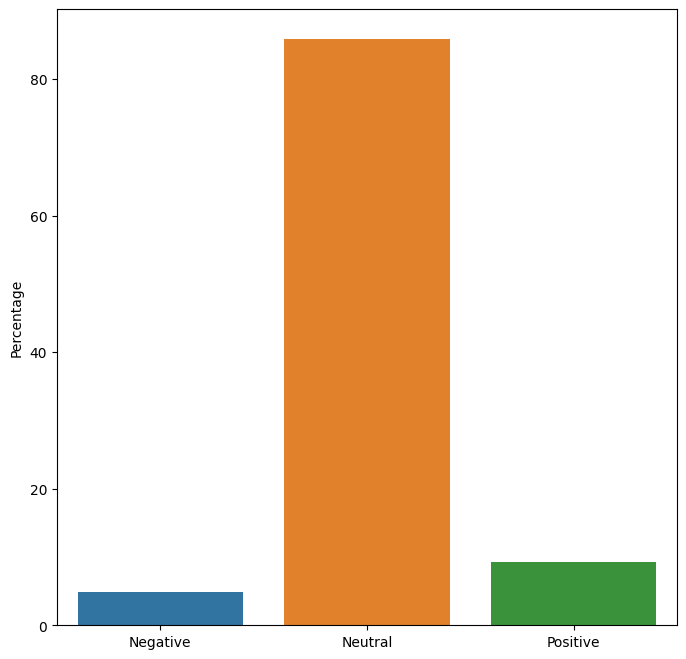

'Representation of sentiment results'

In [ ]:
#Word sentiment representation
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

#Labels of bar graph
ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

"""Representation of sentiment results"""

In [ ]:
#Assigning negative reuls
df_positive_negative = df.loc[df['label'] != 0]
df_positive_negative.head()

"""Negative results"""

,neg,neu,pos,compound,,label
9,0.0,0.0,1.0,0.4404,thanks,1
10,1.0,0.0,0.0,-0.3612,ignore,-1
17,1.0,0.0,0.0,-0.4019,discord,-1
20,1.0,0.0,0.0,-0.4019,discord,-1
21,0.0,0.0,1.0,0.2960,gg,1


In [ ]:
#Labeling both postive and negative label value counts
print(df_positive_negative.label.value_counts())

"""Labeling value counts"""

 1    4782
-1    2502
Name: label, dtype: int64


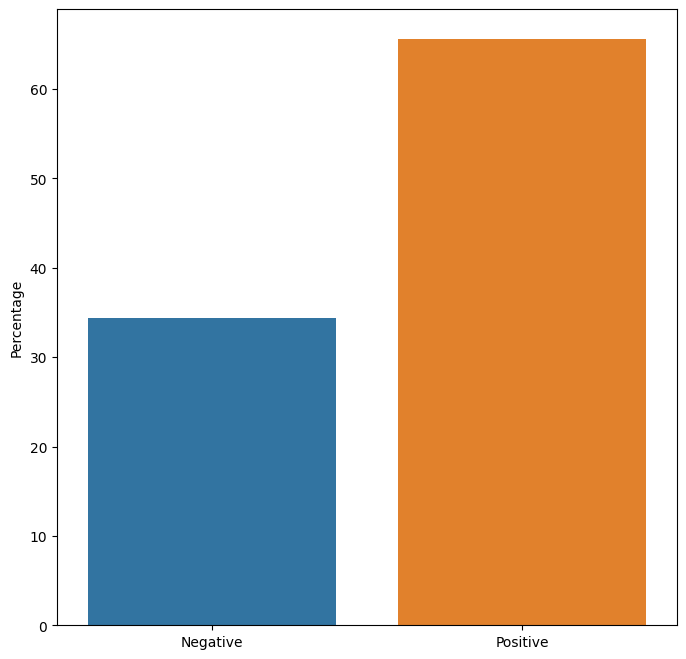

In [ ]:
#Writing subplots
fig, ax = plt.subplots(figsize=(8, 8))

counts = df_positive_negative.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

#Labels of bar graphs
ax.set_xticklabels(['Negative', 'Positive'])
ax.set_ylabel('Percentage')

plt.show()

"""Final results without neutral words"""